# VWAP - Tick Forecast
_Version 2.0_

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import vwap2 as vw

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [3]:
# set up some variables
tickfile = '../Data/TSLA-TAQ-aug19v2.zip'
test_day = '2019-08-30'
taq = pd.read_pickle(tickfile)

In [4]:
# filter on date
day = taq[test_day]

## VWAP Target Function

In [5]:
vwap_coefs = [ 6.82705253e-03, -4.98952946e-05,  2.47593111e-07, -6.04833777e-10, 5.78006232e-13]

## Run the Algo with Tick Factor

In [9]:
# without the tick signal...
order_quantity = 250000
order_side = 'b'
results = vw.algo_loop(day, order_side, order_quantity, vwap_coefs)

2019-10-08 22:01:45:294353: Beginning VWAP run: b 250000 shares
Average stock spread for sample: 1.3625
2019-10-08 22:01:45:493654: starting main loop
2019-10-08 22:06:07:517408: end simulation loop
2019-10-08 22:06:07:517588: order analytics
2019-10-08 22:06:07:621342: VWAP run complete.


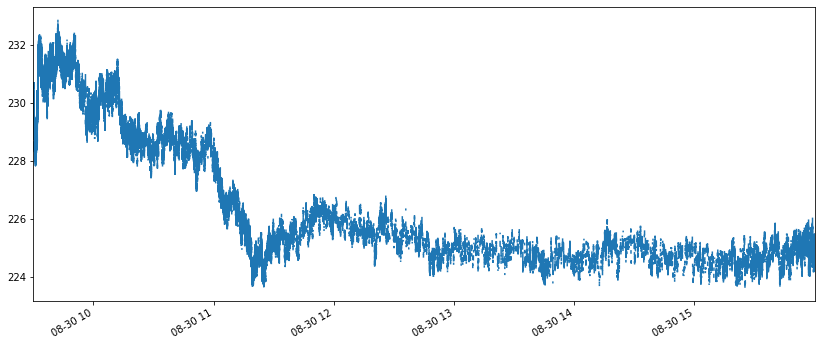

In [10]:
results['fair_values'].plot()

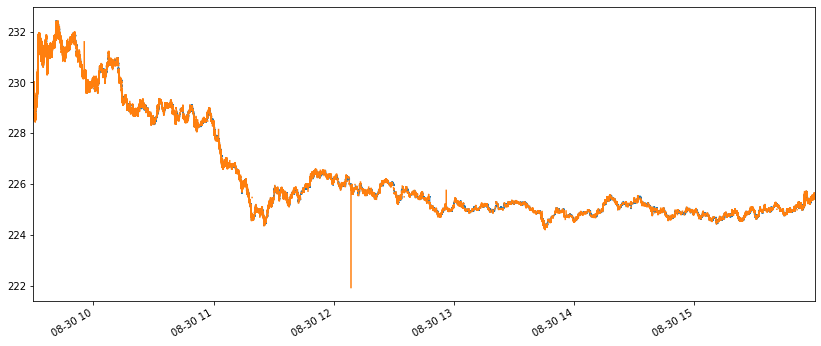

In [11]:
results['midpoints'].plot()
day.trade_px.plot()

In [12]:
data = results['trades']

In [13]:
data[pd.notna(data.price)]['shares'].sum()

255332.0

In [14]:
results.keys()

dict_keys(['midpoints', 'fair_values', 'schedule_factors', 'tick_factors', 'trades', 'quote_count', 'day_vwap', 'avg_price'])

In [15]:
results['day_vwap']

227.90490596599633

In [16]:
results['avg_price']

226.97437007503947

In [17]:
#slippage vs. vwap
results['day_vwap'] - results['avg_price']

0.9305358909568611

In [18]:
results['trades'].groupby(['trade_type']).count()

,price,shares,bar
trade_type,,,
a,558,558,558
p,277,277,277
